# Importing Libraries 

In [1]:
import os
os.chdir('D:/Uddhav/DATA SCIENCE/ML PROJECTS/Property Price Prediction/Dataset')

import pandas as pd
pd.set_option('display.max_column',None)

import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Understanding The Data

In [2]:
df = pd.read_csv('HousePrices.csv')
df = pd.DataFrame(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [3]:
df.describe()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2073.000000,2073.000000,1753.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,1960.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,916.132176,60.556199,72.056475,10717.853353,6.233478,5.835022,1969.445731,1986.617463,101.875668,437.949349,49.219489,565.101302,1052.270140,1166.096961,344.745779,6.168355,1517.011095,0.429329,0.056440,1.571635,0.378678,2.874096,1.052581,6.540280,0.602026,1980.418367,1.775687,474.683068,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,493.014670,159.924810,27.987475,9215.982306,1.517115,1.360214,30.222647,20.432694,179.169217,448.051119,165.621465,449.730940,431.026436,376.975119,438.844748,49.553967,517.236428,0.522605,0.237015,0.545963,0.499873,0.816144,0.237901,1.629673,0.633931,24.158327,0.741976,212.284955,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,519.000000,20.000000,60.000000,7620.000000,5.000000,5.000000,1950.000000,1970.000000,0.000000,0.000000,0.000000,208.000000,794.000000,894.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1963.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,932.000000,50.000000,70.000000,9492.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,381.000000,0.000000,466.000000,990.000000,1095.000000,0.000000,0.000000,1470.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,1302.000000,70.000000,83.000000,11601.000000,7.000000,7.000000,1999.000000,2004.000000,161.500000,708.000000,0.000000,804.000000,1291.000000,1391.000000,730.000000,0.000000,1792.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1820.000000,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2019.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


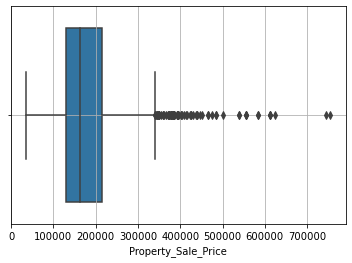

In [4]:
sns.boxplot(df['Property_Sale_Price'])
plt.grid()

In [5]:
df.Property_Sale_Price.max()

755000

In [6]:
df.Property_Sale_Price.min()

34900

## Checking Outliers

In [8]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df.Property_Sale_Price))
print(z)


threshold = 3
print(np.where(z > 5),'\n')

print(z[691])


[0.35007774 0.00677347 0.54080233 ... 0.48275299 0.55268534 0.712894  ]
(array([ 691,  803,  898, 1169, 1182, 1815, 1853, 2025], dtype=int64),) 

7.298810412902537


### Removing Outliers

In [ ]:
df = df[(z < 5)]

df.info()

# Model Building Predictors Treatment

In [9]:
df.rename(columns={'1stFlrSF':'firstFlrSF'}, inplace=True)

In [10]:
df.drop(['Id', 'Dwell_Type','Zone_Class','LotFrontage','LotArea','Road_Type','Alley','Property_Shape','LandContour','Utilities','LotConfig','LandSlope','Condition1','Condition2','Dwelling_Type','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrArea','ExterCond','BsmtCond','BsmtExposure','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','Heating','CentralAir','Electrical','2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Functional','GarageYrBlt','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','MiscVal','MoSold','YrSold','SaleType','SaleCondition','Fireplaces'], axis = 1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Neighborhood         2073 non-null   object
 1   MasVnrType           2059 non-null   object
 2   ExterQual            2073 non-null   object
 3   Foundation           2073 non-null   object
 4   BsmtQual             2014 non-null   object
 5   BsmtFinType1         2014 non-null   object
 6   TotalBsmtSF          2073 non-null   int64 
 7   HeatingQC            2073 non-null   object
 8   firstFlrSF           2073 non-null   int64 
 9   GrLivArea            2073 non-null   int64 
 10  KitchenQual          2073 non-null   object
 11  FireplaceQu          1085 non-null   object
 12  GarageType           1960 non-null   object
 13  GarageFinish         1960 non-null   object
 14  GarageCars           2073 non-null   int64 
 15  GarageArea           2073 non-null   int64 
 16  Proper

#### Treating Null Values Of the Selected Predictors

#### MasVnrType

In [12]:
df.MasVnrType.isnull().sum()

14

In [18]:
df.MasVnrType.value_counts()

None       1247
BrkFace     620
Stone       186
BrkCmn       20
Name: MasVnrType, dtype: int64

In [14]:
df["MasVnrType"].fillna("No", inplace = True)

In [15]:
df['MasVnrType'] = df.get('MasVnrType').replace('No','None')

In [16]:
df.MasVnrType.value_counts()

None       1247
BrkFace     620
Stone       186
BrkCmn       20
Name: MasVnrType, dtype: int64

#### GarageCars

In [17]:
df.GarageCars.isnull().sum()

0

In [19]:
df.GarageCars.value_counts()

2    1185
1     510
3     259
0     113
4       6
Name: GarageCars, dtype: int64

#### ExterQual

In [20]:
df.ExterQual.isnull().sum()

0

In [21]:
df.ExterQual.value_counts()

TA    1272
Gd     706
Ex      76
Fa      19
Name: ExterQual, dtype: int64

#### Foundation

In [22]:
df.Foundation.isnull().sum()

0

In [23]:
df.Foundation.value_counts()

PConc     928
CBlock    901
BrkTil    191
Slab       40
Stone      10
Wood        3
Name: Foundation, dtype: int64

#### BsmtQual

In [29]:
df.BsmtQual.isnull().sum()

0

In [25]:
df.BsmtQual.value_counts()

Gd    904
TA    891
Ex    169
Fa     50
Name: BsmtQual, dtype: int64

In [26]:
df["BsmtQual"].fillna("No", inplace = True)

In [28]:
df.BsmtQual.value_counts()

Gd    904
TA    891
Ex    169
No     59
Fa     50
Name: BsmtQual, dtype: int64

#### HeatingQC

In [30]:
df.HeatingQC.isnull().sum()

0

In [31]:
df.HeatingQC.value_counts()

Ex    1045
TA     618
Gd     341
Fa      68
Po       1
Name: HeatingQC, dtype: int64

#### KitchenQual

In [32]:
df.KitchenQual.isnull().sum()

0

In [33]:
df.KitchenQual.value_counts()

TA    1043
Gd     838
Ex     144
Fa      48
Name: KitchenQual, dtype: int64

#### BsmtFinType1

In [37]:
df.BsmtFinType1.isnull().sum()

0

In [35]:
df["BsmtFinType1"].fillna("No", inplace = True)

In [36]:
df.BsmtFinType1.value_counts()

Unf    604
GLQ    599
ALQ    319
BLQ    210
Rec    173
LwQ    109
No      59
Name: BsmtFinType1, dtype: int64

#### FireplaceQu

In [38]:
df.FireplaceQu.isnull().sum()

988

In [39]:
df["FireplaceQu"].fillna("No", inplace = True)

In [40]:
df.FireplaceQu.value_counts()

No    988
Gd    530
TA    457
Fa     40
Ex     33
Po     25
Name: FireplaceQu, dtype: int64

#### GarageType

In [41]:
df.GarageType.isnull().sum()

113

In [42]:
df["GarageType"].fillna("No", inplace = True)

In [43]:
df.GarageType.value_counts()

Attchd     1252
Detchd      537
BuiltIn     124
No          113
Basment      27
CarPort      12
2Types        8
Name: GarageType, dtype: int64

#### GarageFinish

In [44]:
df.GarageFinish.isnull().sum()

113

In [45]:
df.GarageFinish.fillna("No", inplace = True)

In [46]:
df.GarageFinish.value_counts()

Unf    857
RFn    605
Fin    498
No     113
Name: GarageFinish, dtype: int64

# Model Building

In [47]:
trn = df.iloc[0:1450,]
tst = df.iloc[1451:2073,]

In [48]:
model1_1=smf.ols(formula='Property_Sale_Price ~ TotalBsmtSF + firstFlrSF + GrLivArea + GarageArea + C(GarageCars) + Neighborhood + MasVnrType + C(ExterQual) + Foundation + BsmtQual + HeatingQC + KitchenQual + BsmtFinType1 + FireplaceQu + GarageType + GarageFinish'
               ,data=df).fit()
print(model1_1.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.858
Model:                             OLS   Adj. R-squared:                  0.853
Method:                  Least Squares   F-statistic:                     170.9
Date:                 Tue, 28 Dec 2021   Prob (F-statistic):               0.00
Time:                         00:36:51   Log-Likelihood:                -24284.
No. Observations:                 2073   AIC:                         4.871e+04
Df Residuals:                     2001   BIC:                         4.912e+04
Df Model:                           71                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept       

### RMSE

In [49]:
x_tst = tst.loc[:, tst.columns != 'Property_Sale_Price']
y_tst = tst.loc[:, tst.columns == 'Property_Sale_Price']

In [50]:
pred1_1 = model1_1.predict(x_tst)

In [51]:
y_tst_series = y_tst.iloc[:, 0]

In [52]:
resd1_1 = y_tst_series - pred1_1

In [53]:
import math

se1_1 = resd1_1.pow(2)
sse1_1 = se1_1.sum()
msse1_1 = sse1_1/len(se1_1)
print('RMSE: ',math.sqrt(msse1_1))

RMSE:  24652.184764200476


In [54]:
predict = model1_1.predict() 
residuals = df.Property_Sale_Price - predict

In [55]:
df['predict'] = predict 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Neighborhood         2073 non-null   object 
 1   MasVnrType           2073 non-null   object 
 2   ExterQual            2073 non-null   object 
 3   Foundation           2073 non-null   object 
 4   BsmtQual             2073 non-null   object 
 5   BsmtFinType1         2073 non-null   object 
 6   TotalBsmtSF          2073 non-null   int64  
 7   HeatingQC            2073 non-null   object 
 8   firstFlrSF           2073 non-null   int64  
 9   GrLivArea            2073 non-null   int64  
 10  KitchenQual          2073 non-null   object 
 11  FireplaceQu          2073 non-null   object 
 12  GarageType           2073 non-null   object 
 13  GarageFinish         2073 non-null   object 
 14  GarageCars           2073 non-null   int64  
 15  GarageArea           2073 non-null   i

In [56]:
df['residuals'] = residuals

In [57]:
obs = np.arange(2073 ) 
obs 
obsno = pd.DataFrame(obs) 

df['obsno'] = obsno 

# Normality

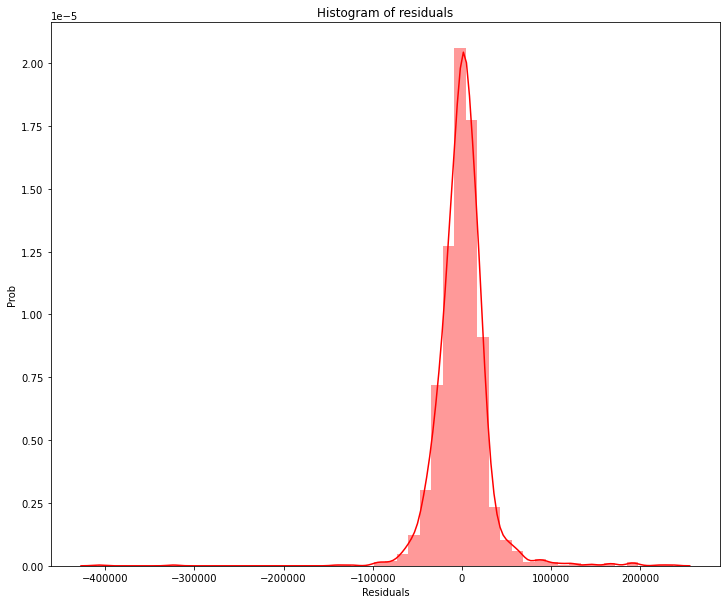

In [58]:
plt.figure(figsize=(12,10))
sns.distplot(df.residuals, color='red')
plt.title('Histogram of residuals')
plt.ylabel('Prob')
plt.xlabel('Residuals')
plt.show()

## Linearity

In [59]:
numerical=df.select_dtypes(include=np.number)
print(len(numerical.columns))
numerical.columns

9


Index(['TotalBsmtSF', 'firstFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea',
       'Property_Sale_Price', 'predict', 'residuals', 'obsno'],
      dtype='object')

In [60]:
x = ['TotalBsmtSF', 'firstFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea',
       'Property_Sale_Price', 'residuals', 'obsno', 'predict']

In [61]:
df_x = df[x]

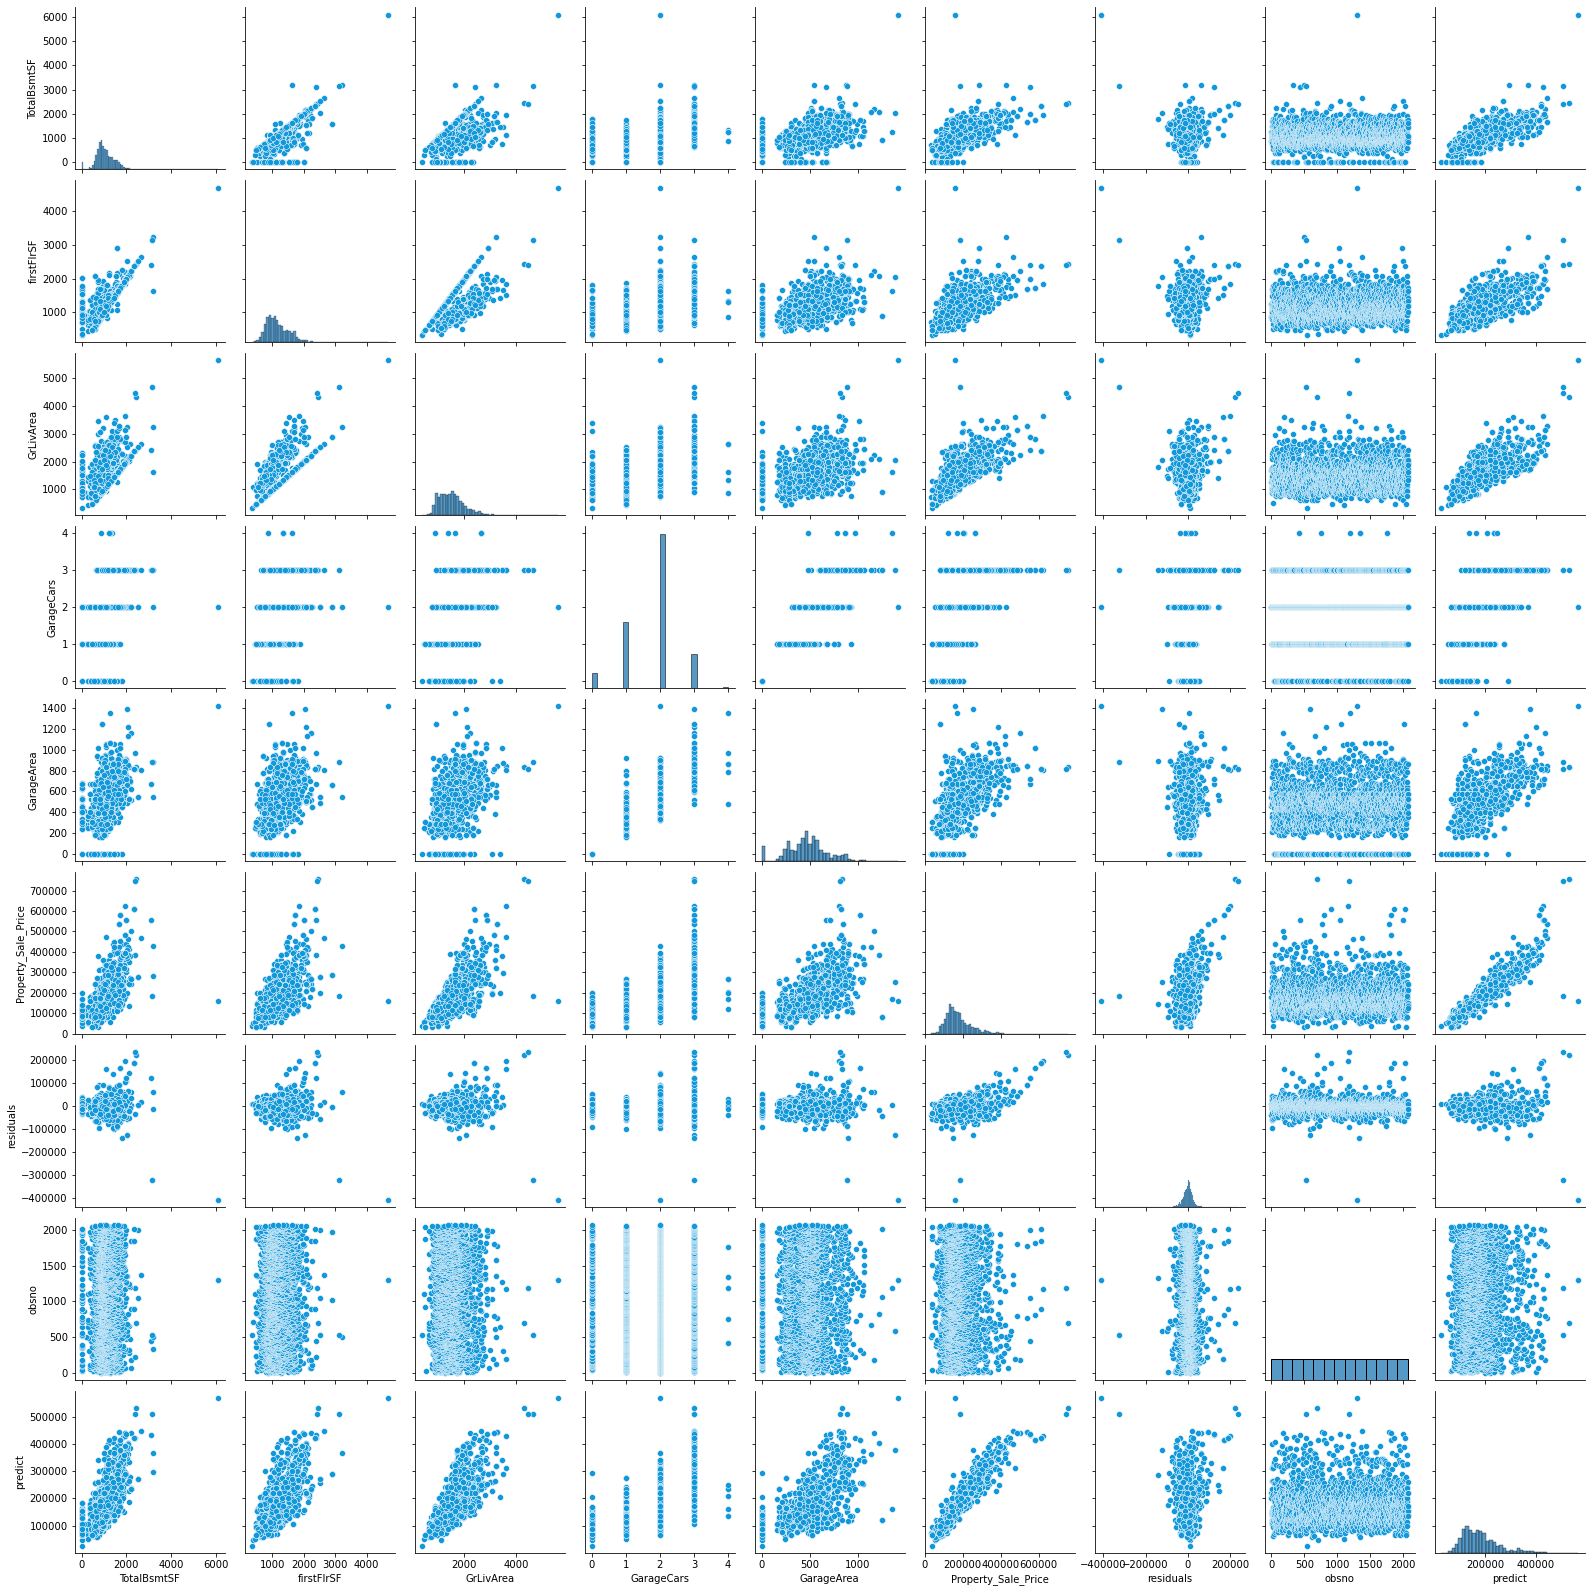

In [62]:
sns.pairplot(df_x,palette = sns.color_palette('bright'),markers = ['>'], plot_kws={'facecolors':'#1198db'})

## Independence of Observations

Text(0.5, 1.0, 'Scatterplot of obsno vs residuals')

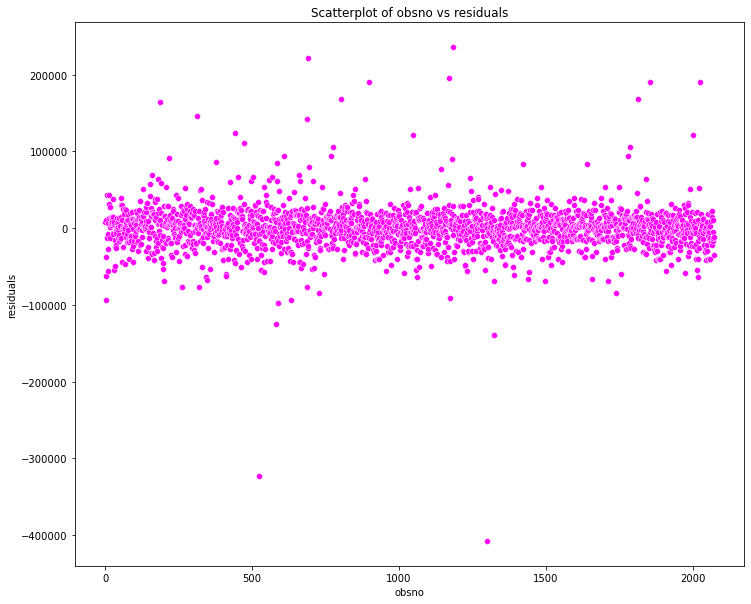

In [63]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df.obsno, y=df.residuals,palette='spring_r', color='magenta',markers='+')
plt.title('Scatterplot of obsno vs residuals')

## Heteroscedasticity

Text(0.5, 1.0, 'Scatterplot of predict vs residuals')

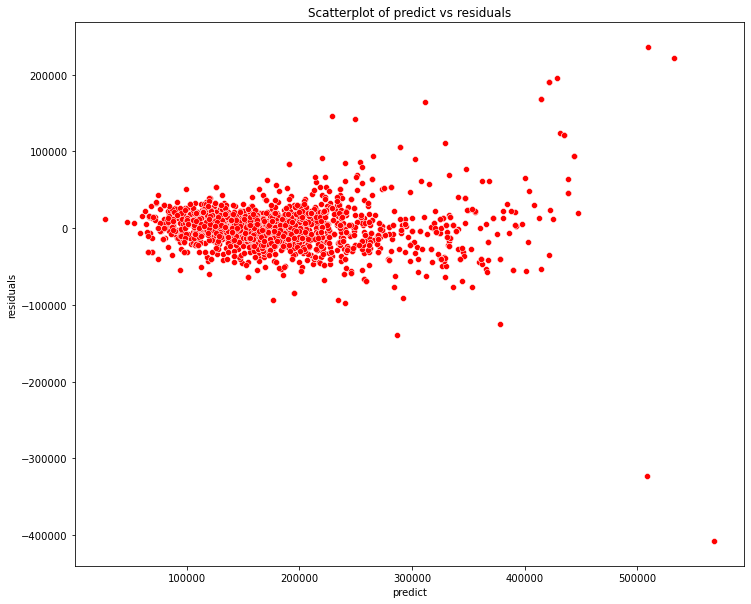

In [64]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df.predict, y=df.residuals,palette='spring_r', color='red')
plt.title('Scatterplot of predict vs residuals')

# VIF

In [65]:
vifs = {'Model 1':4.878048780487806,
        'Model 2':5.181347150259069,
        'Model 3':5.4054054054054035,
        'Model 4':5.5555555555555545,
        'WINNER MODEL':7.04225352112676,}
vif_f = pd.Series(vifs)
vif_f

Model 1         4.878049
Model 2         5.181347
Model 3         5.405405
Model 4         5.555556
WINNER MODEL    7.042254
dtype: float64